Compute drawdawn 

In [1]:
import pandas as pd
me_m=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                 header=0, index_col=0, parse_dates=True, 
                 na_values=-99.99
                )


In [2]:
rets=me_m [['Lo 10', 'Hi 10']]
rets.columns=['SmallCaps', 'LargeCaps']
rets=rets/100
rets.plot.line()
           

In [3]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
rets.index= pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCaps,LargeCaps
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [5]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [6]:
rets.index=rets.index.to_period('M')
rets.head()

,SmallCaps,LargeCaps
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [7]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [8]:
rets.info

<bound method DataFrame.info of          SmallCaps  LargeCaps
1926-07    -0.0145     0.0329
1926-08     0.0512     0.0370
1926-09     0.0093     0.0067
1926-10    -0.0484    -0.0243
1926-11    -0.0078     0.0270
...            ...        ...
2018-08     0.0241     0.0234
2018-09    -0.0168     0.0087
2018-10    -0.1002    -0.0657
2018-11    -0.0365     0.0253
2018-12    -0.1531    -0.0890

[1110 rows x 2 columns]>

In [9]:
#compute drawdawns
#1. compute wealth index
#2.compute previous peaks
#3.compute drawdawn

In [10]:
wealth_index= 1000*(1+rets["LargeCaps"]).cumprod()

In [11]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCaps, dtype: float64

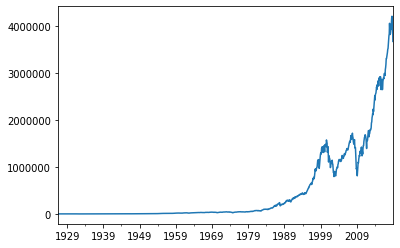

In [16]:
wealth_index.plot.line()

In [20]:
previous_peaks=wealth_index.cummax()

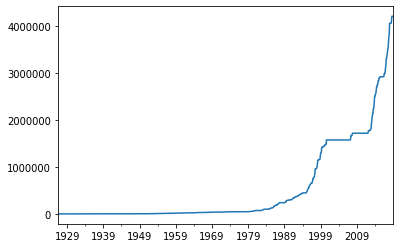

In [21]:
previous_peaks.plot()

In [22]:
drawdown=(wealth_index- previous_peaks)/previous_peaks

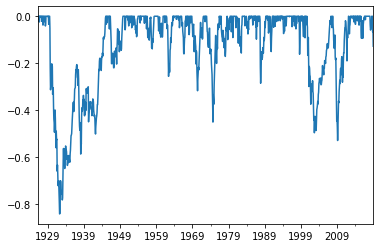

In [25]:
drawdown.plot()

In [27]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCaps, dtype: float64

In [28]:
drawdown.min()

-0.8400375277943123

In [31]:
drawdown["1975":].min()

-0.5280945042309304

In [32]:
drawdown["1975":].idxmin() 

Period('2009-02', 'M')

In [36]:
drawdown.idxmin()

Period('1932-05', 'M')

In [39]:
def drawdown(return_series: pd.Series):
    #documentation of the function
    """"
    Takes a time series of asset returns 
    Compute and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdown
    """
    wealth_index=1000*(1+return_series).cumprod()
    previous_peaks= wealth_index.cummax()
    drawdowns= (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "wealth":wealth_index,
        "peaks": previous_peaks,
        "drawdown":drawdowns
        
        
        
        
    })

In [40]:
drawdown(rets["LargeCaps"]).head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [41]:
drawdown(rets["LargeCaps"])[["wealth","peaks","drawdown"]].head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


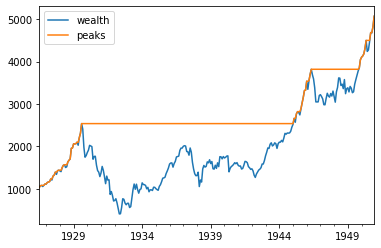

In [44]:
drawdown(rets[:"1950"]["LargeCaps"])[["wealth","peaks"]].plot()

In [45]:
drawdown(rets["LargeCaps"]).head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [48]:
drawdown(rets["LargeCaps"])["drawdown"].min()

-0.8400375277943123

In [49]:
drawdown(rets["SmallCaps"])["drawdown"].min()

-0.8330007793945303

In [50]:
drawdown(rets["SmallCaps"])["drawdown"].idxmin()

Period('1932-05', 'M')

In [51]:
drawdown(rets["LargeCaps"])["drawdown"].idxmin()

Period('1932-05', 'M')

In [53]:
drawdown(rets["1940":]["SmallCaps"])["drawdown"].min()

-0.7000596091967917

In [54]:
drawdown(rets["1940":]["SmallCaps"])["drawdown"].idxmin()

Period('1974-12', 'M')